## Student Cohort Demographics

My first question about the data is to determine what general information can be inferred from the given cohort.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from scipy.stats import pointbiserialr
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association
from pypair.association import binary_continuous, categorical_categorical


In [2]:
student_data = pd.read_csv('./../1.Data/student_data.csv')
student_data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


#### A. Routine Data Quality Checks

Before any inference, I want to ensure that the data is clean, and no pre-processing is required.

In [3]:

# 1. Check for missing values in all columns and replace them with the appropriate metric (Mean/Median/Mode)
# 2. Check for duplicates in the data and remove them
# 3. Check if all the data types have been correctly interpreted by Python. If not, then change them accordingly.


#1. Missing Values
missing_values = student_data.isnull().sum()
print(missing_values)

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [4]:
#2. Duplicates
duplicate_rows = student_data[student_data.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [Marital status, Application mode, Application order, Course, Daytime/evening attendance, Previous qualification, Nacionality, Mother's qualification, Father's qualification, Mother's occupation, Father's occupation, Displaced, Educational special needs, Debtor, Tuition fees up to date, Gender, Scholarship holder, Age at enrollment, International, Curricular units 1st sem (credited), Curricular units 1st sem (enrolled), Curricular units 1st sem (evaluations), Curricular units 1st sem (approved), Curricular units 1st sem (grade), Curricular units 1st sem (without evaluations), Curricular units 2nd sem (credited), Curricular units 2nd sem (enrolled), Curricular units 2nd sem (evaluations), Curricular units 2nd sem (approved), Curricular units 2nd sem (grade), Curricular units 2nd sem (without evaluations), Unemployment rate, Inflation rate, GDP, Target]
Index: []

[0 rows x 35 columns]


In [5]:
#3. Data Types
print(student_data.dtypes)

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender                                              int64
Scholarship holder                                  int64
Age at enrollm

#### 2. Cohort Description

In [6]:
student_data.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


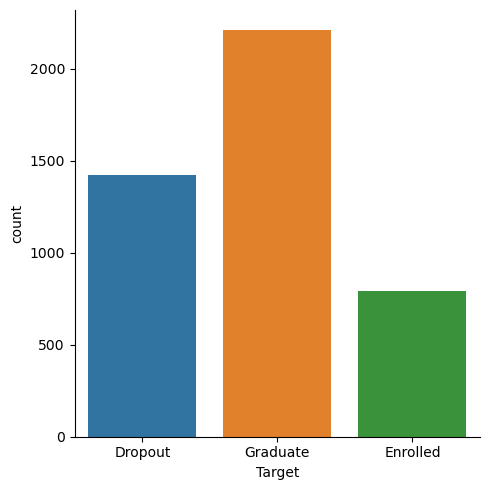

In [7]:
sns.color_palette("rocket")
sns.catplot(student_data, x='Target', kind='count')
plt.show()

In [8]:
student_data['Target'].value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

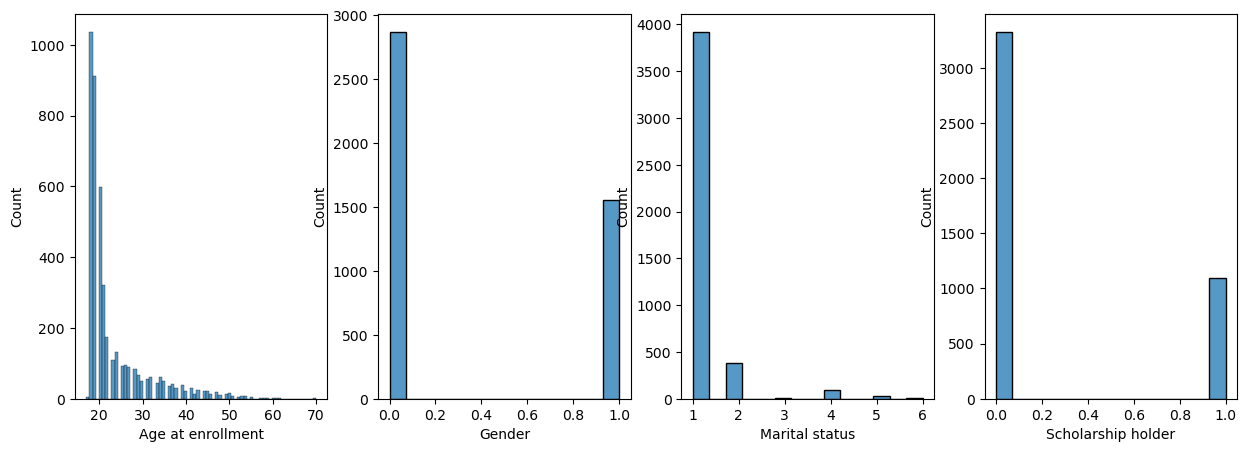

In [9]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15, 5))
sns.histplot(student_data, x='Age at enrollment', ax=ax1)
sns.histplot(student_data, x='Gender', ax=ax2)
sns.histplot(student_data, x='Marital status', ax=ax3)
sns.histplot(student_data, x='Scholarship holder', ax=ax4)
plt.show()

#### 3. Data Manipulation

Since the data represents only a snapshot in time, "enrolled" students may either drop out or graduate. For the purpose of creating a binary comparison (e.g., students who graduate vs. students who drop out) all values pertaining to currently enrolled students will be removed for the current analysis.

In [10]:
student_data_filt = student_data[student_data.Target != 'Enrolled'].copy(deep=False)
student_data_holdout = student_data[student_data.Target == 'Enrolled'].copy(deep=False)

In [11]:
student_data_filt['Target'].value_counts()

Graduate    2209
Dropout     1421
Name: Target, dtype: int64

In [12]:

column_name = [
    'Marital status',
    'Application mode',
    'Application order',
    'Course',
    'Daytime/evening attendance',
    'Previous qualification',
    'Nacionality',
    "Mother's qualification",
    "Father's qualification",
    "Mother's occupation",
    "Father's occupation",
    'Displaced',
    'Educational special needs',
    'Debtor',
    'Tuition fees up to date',
    'Gender',
    'Scholarship holder',
    'Age at enrollment',
    'International',
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)',
    'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)',
    'Curricular units 2nd sem (without evaluations)',
    'Unemployment rate',
    'Inflation rate',
    'GDP',
    'Target'

]

data_type = [
    'Categorical',
    'Categorical',
    'Ordinal',
    'Categorical',
    'Categorical',
    'Categorical',
    'Categorical',
    'Categorical',
    'Categorical',
    'Categorical',
    'Categorical',
    'Binary',
    'Binary',
    'Binary',
    'Binary',
    'Categorical',
    'Binary',
    'Numerical-discrete',
    'Binary',
    'Numerical-discrete',
    'Numerical-discrete',
    'Numerical-discrete',
    'Numerical-discrete',
    'Continuous',
    'Numerical-discrete',
    'Numerical-discrete',
    'Numerical-discrete',
    'Numerical-discrete',
    'Numerical-discrete',
    'Continuous',
    'Numerical-discrete',
    'Continuous',
    'Continuous',
    'Continuous',
    'Binary'
]

data_type_mapping = pd.DataFrame(
    {'Column': column_name,
     'Data Type': data_type
    })

In [13]:
len(column_name) == len(data_type)

True

In [14]:
data_type_mapping[data_type_mapping['Data Type'] == 'Ordinal']

,Column,Data Type
2,Application order,Ordinal


In [15]:
#replace target value with 0 and 1: 1 representing dropout and 0 representing graduate
student_data_filt['Target'].replace({'Dropout': 1, 'Graduate': 0}, inplace=True)

#### 4. Measures of Association for Binary Dependent Variable

1. Continuous or Numerical-Discrete --> Binary: Point-biserial Correlation

Point- biserial correlation coefficient ranges between –1 and +1. Values close to ±1 indicate a strong positive/negative relationship, and values close to zero indicate no relationship between the two variables.

2. Ordinal --> Binary: Rank-biserial Correlation

The rank-biserial correlation is similar to the point-biserial correlation coefficient, but it aims to measure the correlation between a binary and an ordinal variable.

3. Nominal --> Binary: Chi-Squared Test for independence

A Chi-Square Test of Independence is used to determine whether or not there is a significant association between two categorical variables.

4. Binary --> Binary: Phi Coefficient. It is also called the Yule phi or Mean Square Contingency Coefficient and is used for contingency tables when:

- At least one variable is a nominal variable.
- Both variables are dichotomous variables.

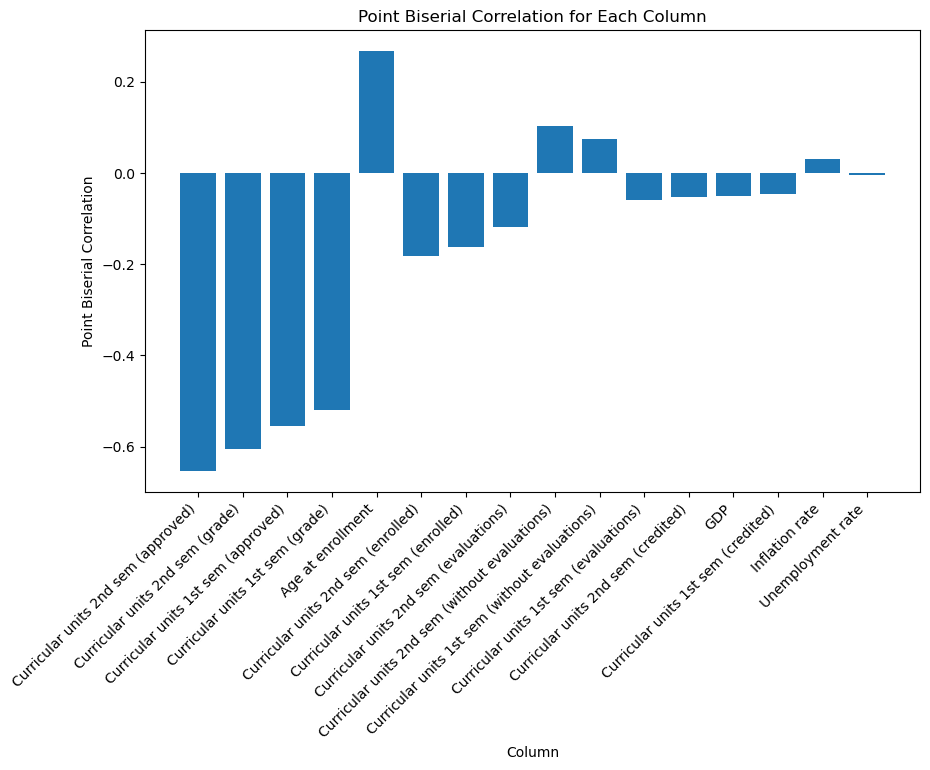

In [16]:
###### 4a. Point Biserial Correlation ######

# Create an empty DataFrame to store the results

# Create an empty list to store the results
results = []

# Iterate through the columns and calculate point biserial correlation
for col in data_type_mapping[(data_type_mapping['Data Type'] == 'Numerical-discrete') | (data_type_mapping['Data Type'] == 'Continuous')]['Column']:
    point_biserial, p_value = pointbiserialr(student_data_filt['Target'], student_data_filt[col])
    results.append({'Column': col, 'Point Biserial': point_biserial, 'P-Value': p_value})

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

# Sort the DataFrame by the absolute value of the point biserial correlation
results_df['Abs Point Biserial'] = results_df['Point Biserial'].abs()
results_df = results_df.sort_values(by='Abs Point Biserial', ascending=False)

# Plot the bar plot
plt.figure(figsize=(10, 6))
plt.bar(results_df['Column'], results_df['Point Biserial'])
plt.xlabel('Column')
plt.ylabel('Point Biserial Correlation')
plt.title('Point Biserial Correlation for Each Column')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

In [17]:
results_df.rename({'Point Biserial': 'Association Result'}, axis=1, inplace=True)
results_df['Association Type'] = 'Point Biserial'

data_type_mapping = data_type_mapping.merge(results_df[['Column', 'Association Type', 'Association Result']], on='Column', how='left')

In [18]:
###### 4b. Rank-biserial Correlation ######

print(
    'Rank-biserial correlation of Application order and Dropout rates', 
    binary_continuous(student_data_filt['Target'], student_data_filt['Application order'], 'rank_biserial')
)

Rank-biserial correlation of Application order and Dropout rates -0.00014204938598226885


##### Integrate Application Order Correlative Significance:

In [19]:
rb = pd.DataFrame(columns=['Column', 'Association Type', 'Association Result'], data=[['Application order', 'Rank-biserial', -0.000142]])

In [20]:
rb.head()

,Column,Association Type,Association Result
0,Application order,Rank-biserial,-0.000142


In [21]:
data_type_mapping.set_index('Column', inplace=True)
data_type_mapping.update(rb.set_index('Column'))
data_type_mapping.reset_index(inplace=True)


In [22]:
plt.rcParams['figure.figsize']= [40,40]

##### Plot Spearman's Correlation for Directional Relationships

In [23]:
#spearman's correlation used for strength and direction of monotonic relationship
corr = student_data_filt.corr(method='spearman') 
mask = np.triu(np.ones_like(corr, dtype=bool))
cut_off = 0.1
extreme_1 = 0.5  # show with a star
extreme_2 = 0.65  # show with a second star
extreme_3 = 0.80  # show with a third star
mask |= np.abs(corr) < cut_off
corr = corr[~mask]  # fill in NaN in the non-desired cells

remove_empty_rows_and_cols = True
if remove_empty_rows_and_cols:
    wanted_cols = np.flatnonzero(np.count_nonzero(~mask, axis=1))
    wanted_rows = np.flatnonzero(np.count_nonzero(~mask, axis=0))
    corr = corr.iloc[wanted_cols, wanted_rows]

annot = [[f"{val:.4f}"
          + ('' if abs(val) < extreme_1 else '\n★')  # add one star if abs(val) >= extreme_1
          + ('' if abs(val) < extreme_2 else '★')  # add an extra star if abs(val) >= extreme_2
          + ('' if abs(val) < extreme_3 else '★')  # add yet an extra star if abs(val) >= extreme_3
          for val in row] for row in corr.to_numpy()]
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=annot, fmt='', cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize': 24}, pad=16)
plt.show()

#### 5. Exploration of Target Correlations

Now that potentially important relationshipos have been identified, a plot of the directional relationship between the target and the comparison variables can be made. The goal is to determine if any obvious trends or distinctions can be identified between our students who graduate and those who dropout.

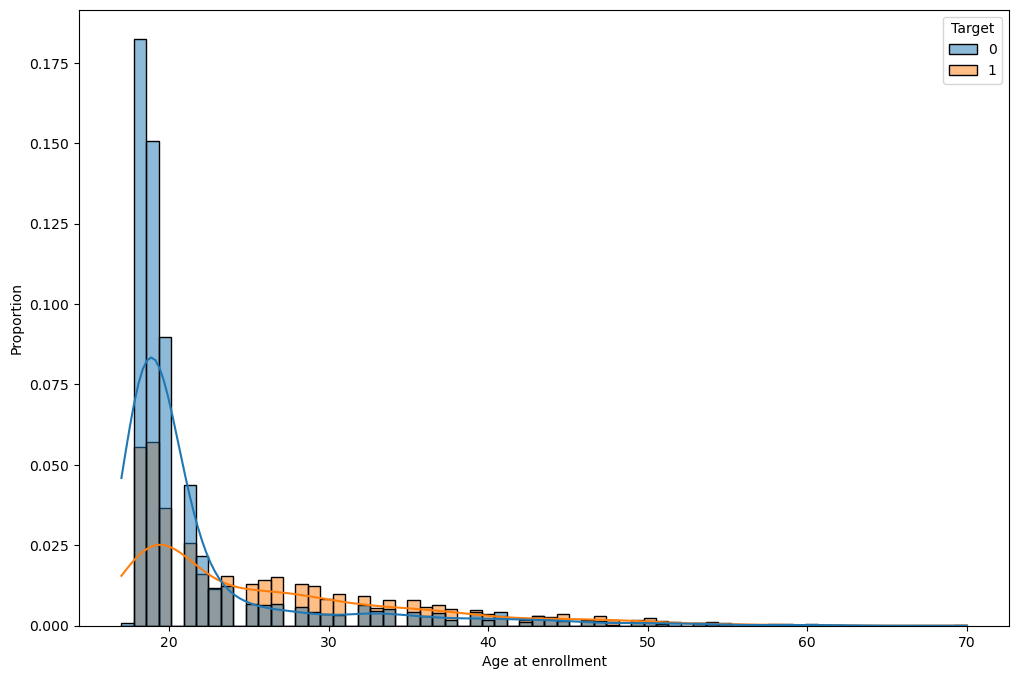

In [ ]:
x, y, hue = "Age at enrollment", "proportion", "Target"
hue_order = ["Graduate", "Dropout"]

# Assuming student_data_filt is your DataFrame
g = sns.histplot(data=student_data_filt, x=x, hue=hue, stat='proportion', multiple="layer", kde=True)

g.figure.set_size_inches(12, 8)
plt.show()

##### Summary: 

At first glance, students who graduate tend to skew younger in terms of age at enrollment while students who drop out tend to skew older at enrollment. There are potentially many reasons as to why this is the case: that is, age may not be a determining factor in whether or not a student drops out. Rather, there may be other conditions that correlate with age and dropping out, such as having children, access to financial assistance, or other gainful employment found.

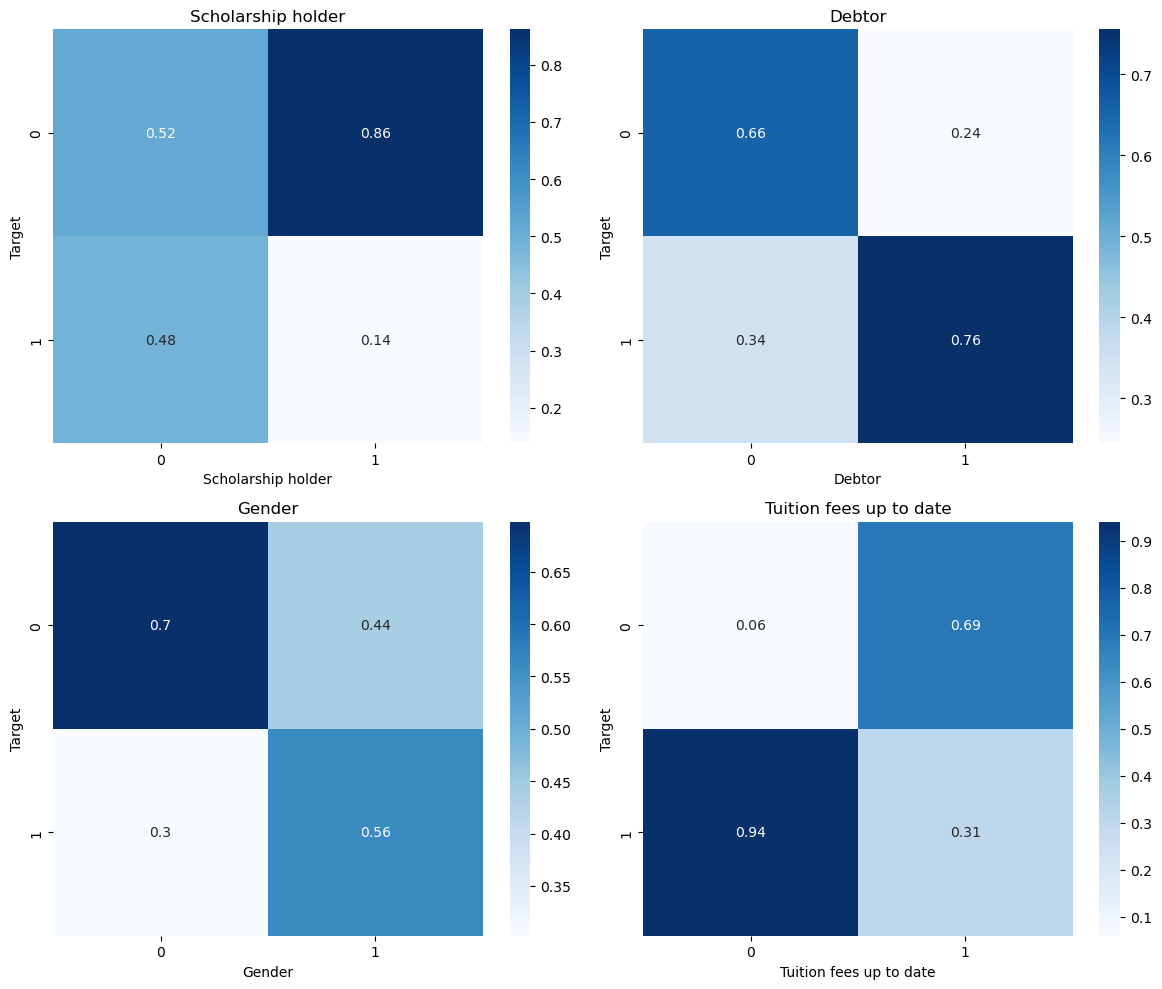

In [ ]:

# Define the contingency tables
contingency_tables = [
    ('Scholarship holder', pd.crosstab(student_data_filt['Target'], student_data_filt['Scholarship holder'])),
    ('Debtor', pd.crosstab(student_data_filt['Target'], student_data_filt['Debtor'])),
    ('Gender', pd.crosstab(student_data_filt['Target'], student_data_filt['Gender'])),
    ('Tuition fees up to date', pd.crosstab(student_data_filt['Target'], student_data_filt['Tuition fees up to date']))
]

# Create a 4x4 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Flatten the array of subplots for easier indexing
axs = axs.flatten()

# Loop through each contingency table and plot the heatmap
for (col_name, contingency_table), ax in zip(contingency_tables, axs):
    normalized_table = pd.crosstab(student_data_filt['Target'], student_data_filt[col_name], normalize='columns')
    sns.heatmap(normalized_table, annot=True, cmap='Blues', ax=ax)
    ax.set_title(col_name)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

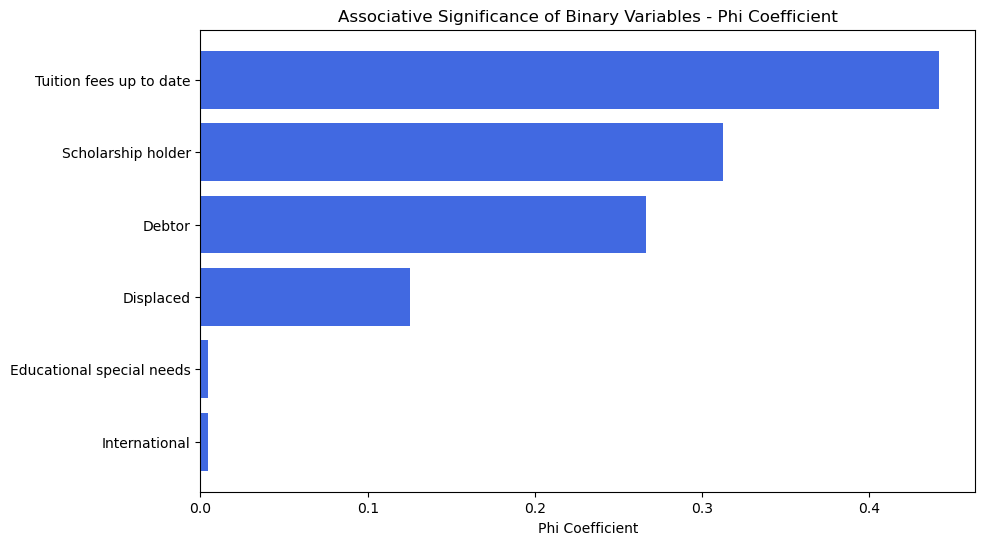

In [ ]:
columns = []
chi2_stats = []
p_values = []
n_obs = []
phi = []

# Loop through categorical columns
for col in data_type_mapping[(data_type_mapping['Data Type'] == 'Binary') & (data_type_mapping['Column']!='Target')]['Column']:
    # Perform chi2_contingency test
    table = student_data_filt.groupby(['Target', col]).size().unstack(fill_value=0)
    n = table.sum().sum()
    chi2_stat, p_value, dof, expected = chi2_contingency(table)

    # Store results in lists
    columns.append(col)
    chi2_stats.append(chi2_stat)
    p_values.append(p_value)
    n_obs.append(n)
    phi.append(np.sqrt(chi2_stat / n))

# Create a DataFrame for plotting
results_df = pd.DataFrame({
    'Column': columns,
    'Chi2 Stat': chi2_stats,
    'P-value': p_values,
    'Num Observations': n_obs,
    'Phi Coefficient': phi
})


# Sort the DataFrame by P-value in ascending order
results_df = results_df.sort_values(by='Phi Coefficient', ascending= True)

# Plot the results
plt.figure(figsize=(10, 6))
plt.barh(results_df['Column'], results_df['Phi Coefficient'], color='royalblue')
#plt.xscale('log')  # Use log scale for better visualization if p-values vary widely
plt.xlabel('Phi Coefficient')
plt.title('Associative Significance of Binary Variables - Phi Coefficient')
plt.show() 

##### Integrate Results to Datatype Mapping

In [ ]:
results_df.rename({'Phi Coefficient': 'Association Result'}, axis=1, inplace=True)
results_df['Association Type'] = 'Phi Coefficient'

In [ ]:
data_type_mapping.set_index('Column', inplace=True)
data_type_mapping.update(results_df[['Column', 'Association Type', 'Association Result']].set_index('Column'))
data_type_mapping.reset_index(inplace=True)

##### Summary: 
Further indications of why a student may drop out are found in the above cross-tabs. Here's a review of each of the tabs above:
- **Scholarship holder**: indication stands to reason, for those who are scholarship holders, 85% of the given cohort graduate, while 15% dropout; for those who do not hold a scholarship the cohort is split 50-50. In a real study, this would indicate some success in targeting students for scholarship, though an understanding of scholarship holders who do dropout could yield insight into causes outside finances that cause students to dropout.
</br>
</br>
- **Debtor** (whether the student is a debtor): perhaps counterintuitive, for those who are debtors, 75% dropout while 25% do not; for those who are not debtors 35% dropout while 65% do not. This, in a real study, would require further analysis as to whether or not access to financial assistance met a given threshold, which caused students to leave the institution. For example, if some of these cohort was in school for longer than the alotted time period, access to funding may have been revoked.
</br>
</br>
- **Gender**: for female, 30% dropout while 70% do not; male, 55% dropout 45% do not. 
</br>
</br>
- **Tuition up to date**: for students who fall behind in tuition payments 95% dropout while 5% do not; for those who are up to date 30% dropout while 70% do not. 

Tl;dr: Student finances seems to affect graduation outcomes. Further research is needed to understand why debtors are more likely to drop out than non-debtors, institutions should identify students who are falling behind in tuition payments early on.


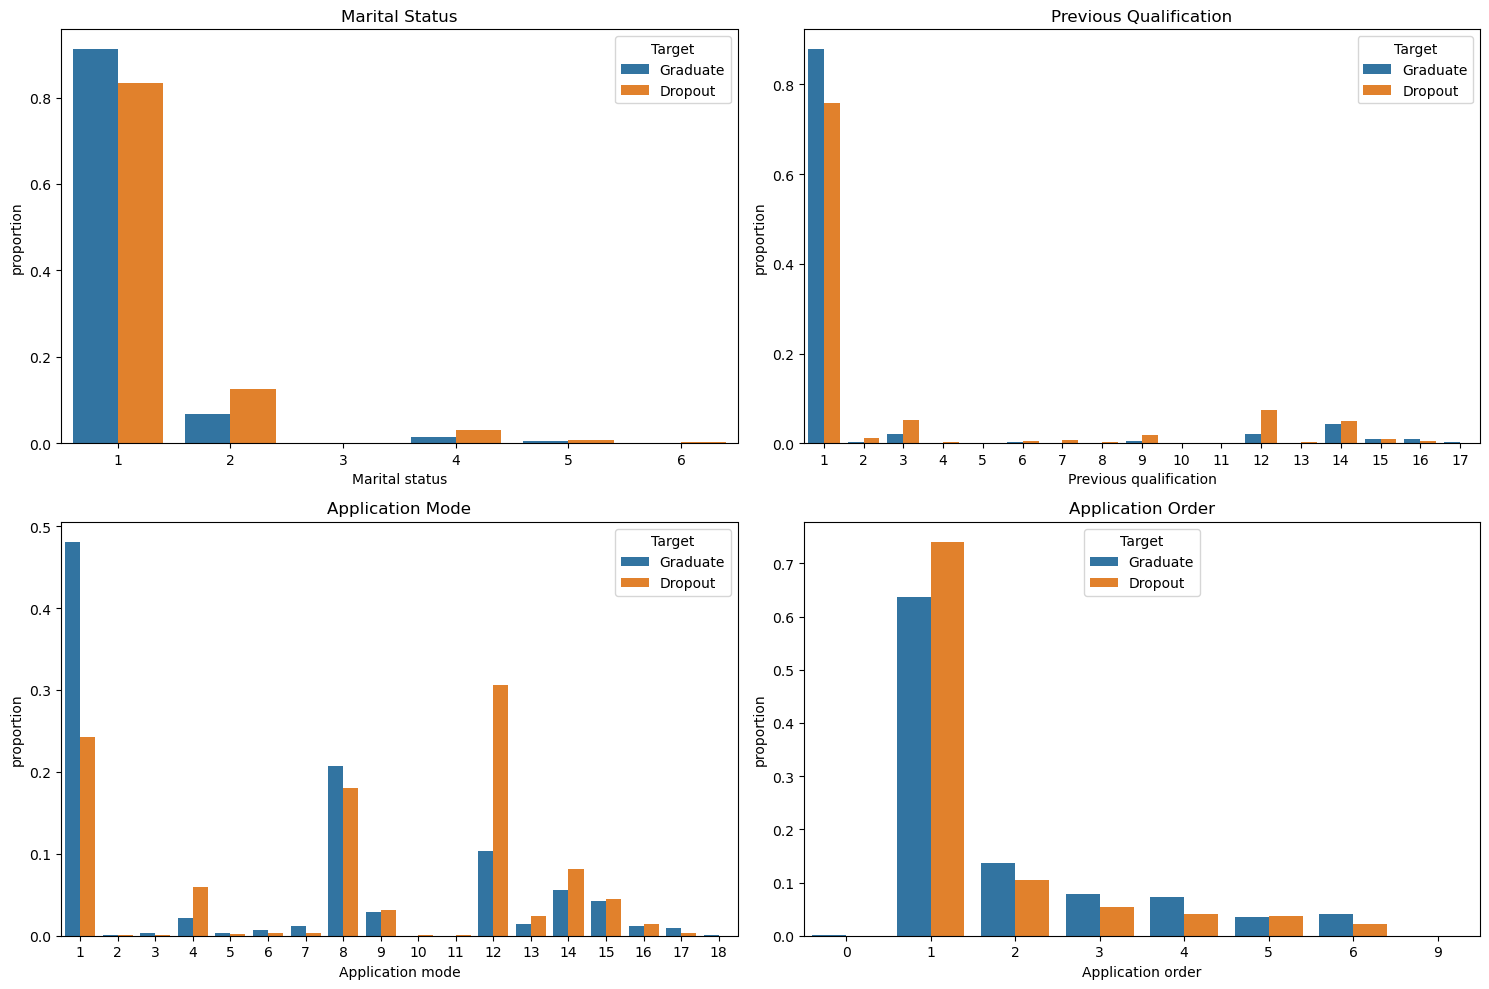

In [ ]:

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# First subplot
x, y, hue = "Marital status", "proportion", "Target"
hue_order = ["Graduate", "Dropout"]

# Load the data for the first subplot
data = (student_data[x].groupby(student_data[hue])
        .value_counts(normalize=True).rename(y).reset_index())

g = sns.barplot(data=data, x=x, y=y, hue=hue, hue_order=hue_order, ax=axes[0, 0])
g.set_title("Marital Status")

# First subplot
x, y, hue = "Previous qualification", "proportion", "Target"
hue_order = ["Graduate", "Dropout"]

# Load the data for the first subplot
data = (student_data[x].groupby(student_data[hue])
        .value_counts(normalize=True).rename(y).reset_index())

g = sns.barplot(data=data, x=x, y=y, hue=hue, hue_order=hue_order, ax=axes[0, 1])
g.set_title("Previous Qualification")

# Third subplot
x, y, hue = "Application mode", "proportion", "Target"
hue_order = ["Graduate", "Dropout"]

# Load the data for the first subplot
data = (student_data[x].groupby(student_data[hue])
        .value_counts(normalize=True).rename(y).reset_index())

g = sns.barplot(data=data, x=x, y=y, hue=hue, hue_order=hue_order, ax=axes[1, 0])
g.set_title("Application Mode")

# Fourth subplot
x, y, hue = "Application order", "proportion", "Target"
hue_order = ["Graduate", "Dropout"]

# Load the data for the first subplot
data = (student_data[x].groupby(student_data[hue])
        .value_counts(normalize=True).rename(y).reset_index())

g = sns.barplot(data=data, x=x, y=y, hue=hue, hue_order=hue_order, ax=axes[1, 1])
g.set_title("Application Order")

plt.tight_layout()
plt.show()

##### Summary: 

The data shows a correlation between age at admission and dropout rates. Approximately 35% of dropouts applied as older than 23, while only 10% of graduates applied as over 23. For graduates, nearly 50% applied in the 1st phase--general contingent. This confirms the finding that dropouts tend to be older on average than graduates at admission. Otherwise, further analysis is required to uncover any insights into graduation rates and data manipulation is needed to infer any relationships.

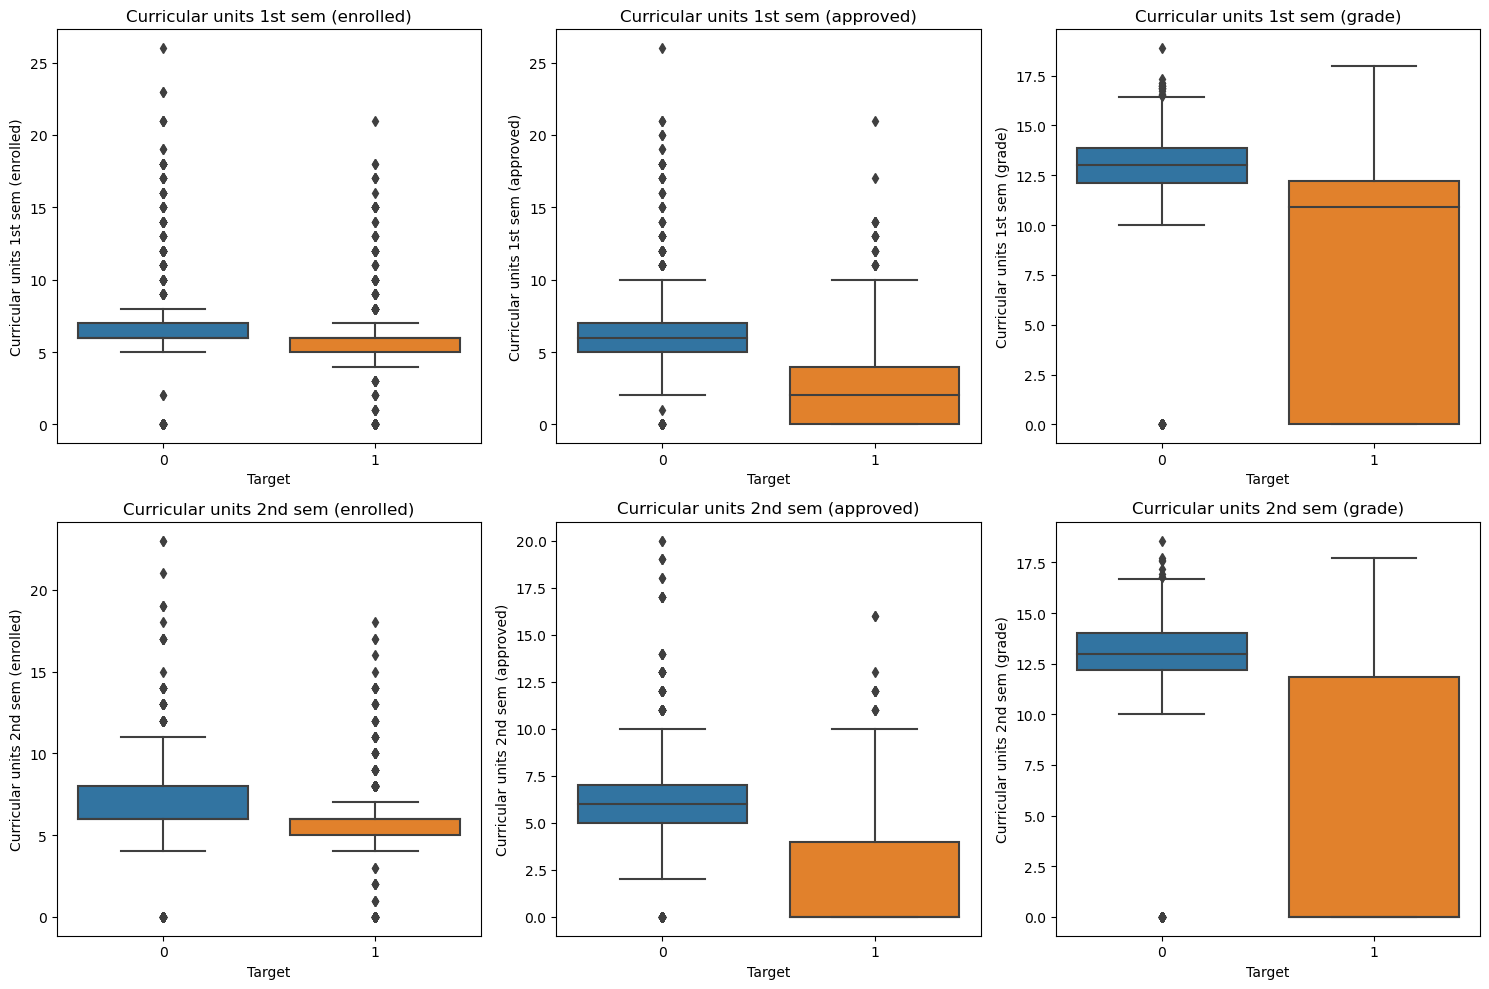

In [ ]:
target_cols = [
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)'
]

data = student_data_filt[['Target'] + target_cols].copy(deep=False)


# Create a grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns

# Flatten the array of subplots for easier indexing
axs = axs.flatten()

# Iterate over target columns and corresponding subplot axes
for i, (target_col, ax) in enumerate(zip(target_cols, axs)):
    sns.boxplot(data=data, x='Target', y=target_col, ax=ax)
    ax.set_title(target_col)  # Set subplot title

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

##### Summary:

The general trend supports the notion: students who drop out tend to have worse grades, as well as fewer enrolled and approved courses. While some students may pass courses and still drop out, the majority of students who drop out tend to have a failing average.

In [ ]:
dropout_pass = round(len(student_data_filt[(student_data_filt.Target == 1) & (student_data_filt['Curricular units 1st sem (grade)'] >= 12.5) \
& (student_data_filt['Curricular units 2nd sem (grade)'] >= 12.5)]) / len(student_data_filt[student_data_filt.Target == 1]), 2)

print(f"Percentage of dropouts that passed: {dropout_pass*100}%")

Percentage of dropouts that passed: 11.0%


##### 6. Categorical - Categorical Associations:

The source literature provides a compelling graph highlighting dropout rates by enrolled course, a pattern not detected by the spearman correlation test. The appropriate correlation test--Cramer's V-- needs to be applied to Categorical Variables

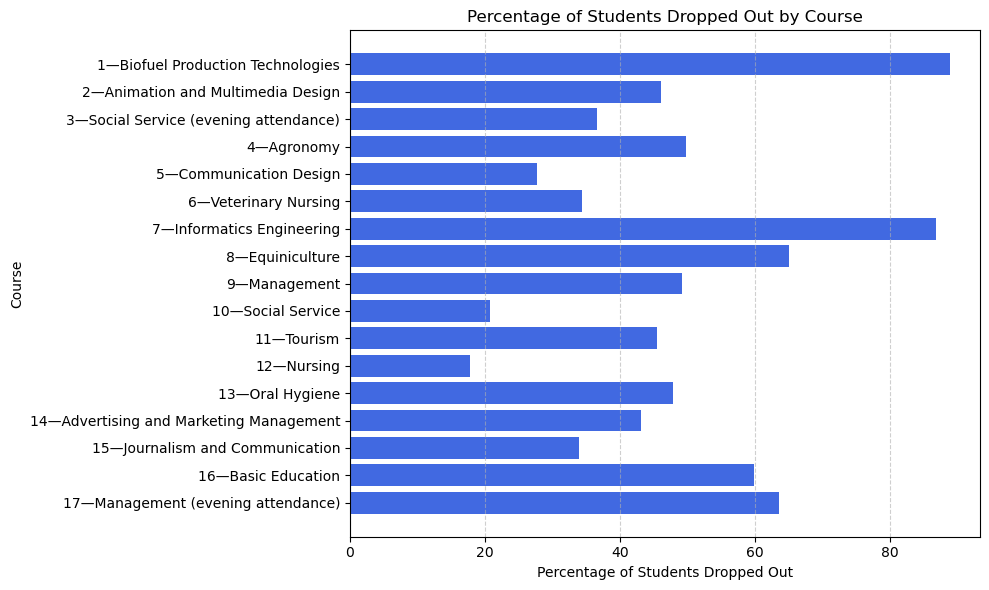

In [ ]:
# Create a horizontal bar chart to visualize the percentage of students who dropped out for each course
percentage_dropped_out_per_course = student_data_filt.groupby('Course')['Target'].mean() * 100

# Create a list of course names as y-ticks
courses = [
    '1—Biofuel Production Technologies',
    '2—Animation and Multimedia Design',
    '3—Social Service (evening attendance)',
    '4—Agronomy',
    '5—Communication Design',
    '6—Veterinary Nursing',
    '7—Informatics Engineering',
    '8—Equiniculture',
    '9—Management',
    '10—Social Service',
    '11—Tourism',
    '12—Nursing',
    '13—Oral Hygiene',
    '14—Advertising and Marketing Management',
    '15—Journalism and Communication',
    '16—Basic Education',
    '17—Management (evening attendance)'
]

# Create a horizontal bar chart to visualize the percentage of students who dropped out for each course
plt.figure(figsize=(10, 6))
plt.barh(percentage_dropped_out_per_course.index, percentage_dropped_out_per_course.values, color='royalblue')
plt.xlabel('Percentage of Students Dropped Out')
plt.ylabel('Course')
plt.title('Percentage of Students Dropped Out by Course')

# Set the y-ticks to the course names
plt.yticks(percentage_dropped_out_per_course.index, courses)

# Invert the y-axis to display the course with the highest dropout rate at the top
plt.gca().invert_yaxis()

# Add grid lines
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

##### 7. Cleaning of Categorical Variables


In [ ]:
for column in data_type_mapping[data_type_mapping['Data Type'] == 'Categorical']['Column']:
    print(column)
    print(student_data_filt[column].value_counts())
    print('\n')

Marital status
1    3199
2     327
4      75
5      22
6       5
3       2
Name: Marital status, dtype: int64


Application mode
1     1408
8      713
12     664
14     237
15     157
4      132
9      108
13      66
16      46
7       30
17      25
6       20
5       10
3        8
2        3
18       1
10       1
11       1
Name: Application mode, dtype: int64


Course
12    666
10    313
15    297
9     272
6     262
14    220
17    214
11    211
3     194
5     184
2     178
4     173
16    142
8     120
7     106
13     69
1       9
Name: Course, dtype: int64


Daytime/evening attendance
1    3222
0     408
Name: Daytime/evening attendance, dtype: int64


Previous qualification
1     3019
14     164
12     149
3      122
9       39
15      34
16      28
2       22
6       15
7       11
4        7
17       6
13       6
8        4
11       2
5        1
10       1
Name: Previous qualification, dtype: int64


Nacionality
1     3544
14      32
9       12
12       9
3        8
10       5

In [ ]:
student_data_filt['Marital status'].replace({1: 'Single', 2: 'Married', 4: 'Divorced', 3: 'Other_Marital', 5: 'Other_Marital', 6: 'Other_Marital'}, inplace=True)
student_data_filt['Gender'].replace({0: 'Female', 1: 'Male'}, inplace=True)
student_data_filt['Daytime/evening attendance']. replace({0: 'evening', 1: 'daytime'}, inplace=True)
student_data_filt['Course'].replace({
    1: 'Technology and Information Systems',
    2: 'Animation and Digital Art',
    3: 'Social Service',
    4: 'Agronomy',
    5: 'Communication Sciences',
    6: 'Vetinary',
    7: 'Technology and Information Systems',
    8: 'Equine Studies',
    9: 'Management',
    10: 'Social Service',
    11: 'Tourism', 
    12: 'Nursing',
    13: 'Oral Hygiene',
    14: 'Advertising and Marketing',
    15: 'Journalism and Communication',
    16: 'General Studies',
    17: 'Management'
}, inplace=True)
student_data_filt['Nacionality'].replace({
    1: 'Portuguese',
    2: 'Non-Portuguese',
    3: 'Non-Portuguese',
    4: 'Non-Portuguese',
    5: 'Non-Portuguese',
    6: 'Non-Portuguese',
    7: 'Non-Portuguese',
    8: 'Non-Portuguese',
    9: 'Non-Portuguese',
    10: 'Non-Portuguese',
    11: 'Non-Portuguese',
    12: 'Non-Portuguese',
    13: 'Non-Portuguese',
    14: 'Non-Portuguese',
    15: 'Non-Portuguese',
    16: 'Non-Portuguese',
    17: 'Non-Portuguese',
    18: 'Non-Portuguese',
    19: 'Non-Portuguese',
    20: 'Non-Portuguese',
    21: 'Non-Portuguese'
}, inplace=True)
student_data_filt['Previous qualification'].replace({
    1: 'S-SecondaryEducation',
    2: 'S-HigherEducation',
    3: 'S-HigherEducation',
    4: 'S-HigherEducation',
    5: 'S-HigherEducation',
    6: 'S-HigherEducation',
    7: 'S-SecondaryIncomplete',
    8: 'S-SecondaryIncomplete',
    9: 'S-SecondaryIncomplete',
    10: 'S-SecondaryIncomplete',
    11: 'S-SecondaryIncomplete',
    12: 'S-BasicEducation',
    13: 'S-BasicEducation',
    14: 'S-Technical',
    15: 'S-HigherEducation',
    16: 'S-Technical',
    17: 'S-HigherEducation'
}, inplace=True)
student_data_filt['Mother\'s qualification'].replace({
    1: 'M-SecondaryEducation',
    2: 'M-HigherEducation',
    3: 'M-HigherEducation',
    4: 'M-HigherEducation',
    5: 'M-HigherEducation',
    6: 'M-HigherEducation',
    7: 'M-SecondaryIncomplete',
    8: 'M-SecondaryIncomplete',
    9: 'M-SecondaryIncomplete',
    10: 'M-SecondaryIncomplete',
    11: 'M-SecondaryIncomplete',
    12: 'M-SecondaryIncomplete',
    13: 'M-SecondaryIncomplete',
    14: 'M-BasicEducation',
    15: 'M-SecondaryIncomplete',
    16: 'M-TechnicalProfessional',
    17: 'M-SecondaryIncomplete',
    18: 'M-SecondaryIncomplete',
    19: 'M-SecondaryIncomplete',
    20: 'M-SecondaryIncomplete',
    21: 'M-SecondaryIncomplete',
    22: 'M-TechnicalProfessional',
    23: 'M-TechnicalProfessional',
    24: 'M-SecondaryIncomplete',
    25: 'M-SecondaryIncomplete',
    26: 'M-SecondaryIncomplete',
    27: 'M-BasicEducation',
    28: 'M-BasicEducation',
    29: 'M-TechnicalProfessional',
    30: 'M-HigherEducation',
    31: 'M-TechnicalProfessional',
    32: 'M-TechnicalProfessional',
    33: 'M-HigherEducation',
    34: 'M-HigherEducation'
}, inplace=True)
student_data_filt['Father\'s qualification'].replace({
    1: 'F-SecondaryEducation',
    2: 'F-HigherEducation',
    3: 'F-HigherEducation',
    4: 'F-HigherEducation',
    5: 'F-HigherEducation',
    6: 'F-HigherEducation',
    7: 'F-SecondaryIncomplete',
    8: 'F-SecondaryIncomplete',
    9: 'F-SecondaryIncomplete',
    10: 'F-SecondaryIncomplete',
    11: 'F-SecondaryIncomplete',
    12: 'F-SecondaryIncomplete',
    13: 'F-SecondaryIncomplete',
    14: 'F-BasicEducation',
    15: 'F-SecondaryIncomplete',
    16: 'F-TechnicalProfessional',
    17: 'F-SecondaryIncomplete',
    18: 'F-SecondaryIncomplete',
    19: 'F-SecondaryIncomplete',
    20: 'F-SecondaryIncomplete',
    21: 'F-SecondaryIncomplete',
    22: 'F-TechnicalProfessional',
    23: 'F-TechnicalProfessional',
    24: 'F-SecondaryIncomplete',
    25: 'F-SecondaryIncomplete',
    26: 'F-SecondaryIncomplete',
    27: 'F-BasicEducation',
    28: 'F-BasicEducation',
    29: 'F-TechnicalProfessional',
    30: 'F-HigherEducation',
    31: 'F-TechnicalProfessional',
    32: 'F-TechnicalProfessional',
    33: 'F-HigherEducation',
    34: 'F-HigherEducation'
}, inplace=True)
student_data_filt['Mother\'s occupation'].replace({
    1: 'M-Student',
    2: 'M-AdministrativeManagement',
    3: 'M-IntellectualScientific',
    4: 'M-TechnicalSkilled',
    5: 'M-SupportAdministrative',
    6: 'M-ServiceSales',
    7: 'M-AgricultureFarming',
    8: 'M-TechnicalSkilled',
    9: 'M-TechnicalSkilled',
    10: 'M-UnskilledLabor',
    11: 'M-ArmedForces',
    12: 'M-OtherMiscellaneous',
    13: 'M-ArmedForces',
    14: 'M-ArmedForces',
    15: 'M-ArmedForces',
    16: 'M-ArmedForces',
    17: 'M-AdministrativeManagement',
    18: 'M-AdministrativeManagement',
    19: 'M-IntellectualScientific',
    20: 'M-IntellectualScientific',
    21: 'M-IntellectualScientific',
    22: 'M-IntellectualScientific',
    23: 'M-TechnicalSkilled',
    24: 'M-TechnicalSkilled',
    25: 'M-TechnicalSkilled',
    26: 'M-TechnicalSkilled',
    27: 'M-SupportAdministrative',
    28: 'M-SupportAdministrative',
    29: 'M-SupportAdministrative',
    30: 'M-ServiceSales',
    31: 'M-ServiceSales',
    32: 'M-ServiceSales',
    33: 'M-ServiceSales',
    34: 'M-AgricultureFarming',
    35: 'M-AgricultureFarming',
    36: 'M-TechnicalSkilled',
    37: 'M-TechnicalSkilled',
    38: 'M-TechnicalSkilled',
    39: 'M-TechnicalSkilled',
    40: 'M-TechnicalSkilled',
    41: 'M-TechnicalSkilled',
    42: 'M-TechnicalSkilled',
    43: 'M-OtherMiscellaneous',
    44: 'M-OtherMiscellaneous',
    45: 'M-OtherMiscellaneous',
    46: 'M-OtherMiscellaneous'
}, inplace=True)
student_data_filt['Father\'s occupation'].replace({
    1: 'F-Student',
    2: 'F-AdministrativeManagement',
    3: 'F-IntellectualScientific',
    4: 'F-TechnicalSkilled',
    5: 'F-SupportAdministrative',
    6: 'F-ServiceSales',
    7: 'F-AgricultureFarming',
    8: 'F-TechnicalSkilled',
    9: 'F-TechnicalSkilled',
    10: 'F-UnskilledLabor',
    11: 'F-ArmedForces',
    12: 'F-OtherMiscellaneous',
    13: 'F-ArmedForces',
    14: 'F-ArmedForces',
    15: 'F-ArmedForces',
    16: 'F-ArmedForces',
    17: 'F-AdministrativeManagement',
    18: 'F-AdministrativeManagement',
    19: 'F-IntellectualScientific',
    20: 'F-IntellectualScientific',
    21: 'F-IntellectualScientific',
    22: 'F-IntellectualScientific',
    23: 'F-TechnicalSkilled',
    24: 'F-TechnicalSkilled',
    25: 'F-TechnicalSkilled',
    26: 'F-TechnicalSkilled',
    27: 'F-SupportAdministrative',
    28: 'F-SupportAdministrative',
    29: 'F-SupportAdministrative',
    30: 'F-ServiceSales',
    31: 'F-ServiceSales',
    32: 'F-ServiceSales',
    33: 'F-ServiceSales',
    34: 'F-AgricultureFarming',
    35: 'F-AgricultureFarming',
    36: 'F-TechnicalSkilled',
    37: 'F-TechnicalSkilled',
    38: 'F-TechnicalSkilled',
    39: 'F-TechnicalSkilled',
    40: 'F-TechnicalSkilled',
    41: 'F-TechnicalSkilled',
    42: 'F-TechnicalSkilled',
    43: 'F-OtherMiscellaneous',
    44: 'F-OtherMiscellaneous',
    45: 'F-OtherMiscellaneous',
    46: 'F-OtherMiscellaneous'
}, inplace=True)
student_data_filt['Application mode'].replace({
    1: 'FirstPhaseApp',
    2: 'OtherApp',
    3: 'FirstPhaseApp',
    4: 'DegreeExperienceApp',
    5: 'OtherApp',
    6: 'OtherApp',
    7: 'FirstPhaseApp',
    8: 'SecondThirdPhaseApp',
    9: 'SecondThirdPhaseApp',
    10: 'OtherApp',
    11: 'OtherApp',
    12: 'Over23App',
    13: 'TransferApp',
    14: 'TransferApp',
    15: 'DegreeExperienceApp',
    16: 'TransferApp',
    17: 'DegreeExperienceApp',
    18: 'OtherApp'
}, inplace=True)

In [ ]:
for column in data_type_mapping[data_type_mapping['Data Type'] == 'Categorical']['Column']:
    print(column)
    print(student_data_filt[column].value_counts())
    print('\n')

Marital status
Single           3199
Married           327
Divorced           75
Other_Marital      29
Name: Marital status, dtype: int64


Application mode
FirstPhaseApp          1446
SecondThirdPhaseApp     821
Over23App               664
TransferApp             349
DegreeExperienceApp     314
OtherApp                 36
Name: Application mode, dtype: int64


Course
Nursing                               666
Social Service                        507
Management                            486
Journalism and Communication          297
Vetinary                              262
Advertising and Marketing             220
Tourism                               211
Communication Sciences                184
Animation and Digital Art             178
Agronomy                              173
General Studies                       142
Equine Studies                        120
Technology and Information Systems    115
Oral Hygiene                           69
Name: Course, dtype: int64


Daytime/even

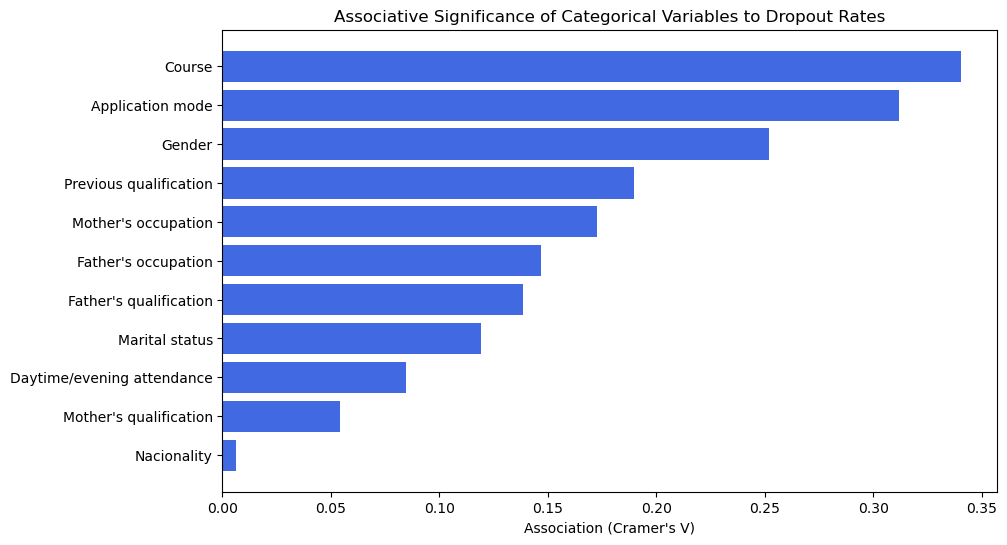

In [ ]:

# Create empty lists to store results
columns = []
associations = []

# Loop through binary columns
for col in data_type_mapping[(data_type_mapping['Data Type'] == 'Categorical') & (data_type_mapping.Column != 'Target')]['Column']:
    table = student_data_filt.groupby(['Target', col]).size().unstack(fill_value=0)
    association_value = association(table, 'cramer')

    # Store results in lists
    columns.append(col)
    associations.append(association_value)

# Create a DataFrame for plotting
results_df = pd.DataFrame({
    'Column': columns,
    'Association': associations
})

# Sort the DataFrame by association in descending order
results_df = results_df.sort_values(by='Association', ascending=True)

# Plot the results
plt.figure(figsize=(10, 6))
plt.barh(results_df['Column'], results_df['Association'], color='royalblue')
plt.xlabel('Association (Cramer\'s V)')
plt.title('Associative Significance of Categorical Variables to Dropout Rates')
plt.show()

##### Integrate Correlations into Data Mapping

In [ ]:
results_df.rename({'Association': 'Association Result'}, axis=1, inplace=True)  
results_df['Association Type'] = 'Cramer\'s V'

In [ ]:
results_df.head()

,Column,Association Result,Association Type
5,Nacionality,0.006181,Cramer's V
6,Mother's qualification,0.053966,Cramer's V
3,Daytime/evening attendance,0.084496,Cramer's V
0,Marital status,0.119189,Cramer's V
7,Father's qualification,0.138494,Cramer's V


In [ ]:
data_type_mapping.set_index('Column', inplace=True)
data_type_mapping.update(results_df[['Column', 'Association Type', 'Association Result']].set_index('Column'))
data_type_mapping.reset_index(inplace=True)

In [ ]:
data_type_mapping.head()

,Column,Data Type,Association Type,Association Result
0,Marital status,Categorical,Cramer's V,0.119189
1,Application mode,Categorical,Cramer's V,0.311989
2,Application order,Ordinal,Rank-biserial,-0.000142
3,Course,Categorical,Cramer's V,0.340179
4,Daytime/evening attendance,Categorical,Cramer's V,0.084496


##### Apply a general guideline of Association Impact

The final output is an attempt to display the impact of each independent variable in relation to the dependent variable. Please note that the impact scale is a guideline. Also, in the formula below, abs() is required to catch correlations such as Point Biserial that range between -1 and 1.

In [ ]:
impact_scale = {
    'Point Biserial': [0.15, 0.3],
    'Rank-biserial': [0.2, 0.4],
    'Phi Coefficient': [0.1,0.3],
    'Cramer\'s V': [0.1, 0.2]
}

In [ ]:
data_type_mapping['Impact'] = data_type_mapping[data_type_mapping.Column != 'Target'].apply(lambda x: 'High' if abs(x['Association Result']) >= impact_scale[x['Association Type']][1] else ('Low' if abs(x['Association Result']) <= impact_scale[x['Association Type']][0] else 'Medium'), axis=1)

In [ ]:
data_type_mapping.head()

,Column,Data Type,Association Type,Association Result,Impact
0,Marital status,Categorical,Cramer's V,0.119189,Medium
1,Application mode,Categorical,Cramer's V,0.311989,High
2,Application order,Ordinal,Rank-biserial,-0.000142,Low
3,Course,Categorical,Cramer's V,0.340179,High
4,Daytime/evening attendance,Categorical,Cramer's V,0.084496,Low


In [ ]:
data_type_mapping.to_csv('./../1.Data/data_type_mapping.csv', index=False)

##### Summary: 

As discussed earlier, course is a strong predictor of dropout, as are other variables. This change in outcome is due to the application of the appropriate associative test to the given variables. The variables are prepared for one-hot encoding; where possible, "other" was applied to avoid unnecessarily sparse matrices.

In [ ]:
## write to csv
student_data_filt.to_csv('./../1.Data/student_data_filt.csv', index=False)
student_data_holdout.to_csv('./../1.Data/student_data_holdout.csv', index=False)

Reference:
1. Associations: https://journals.sagepub.com/doi/pdf/10.1177/8756479308317006
2. Association in Python: https://medium.com/@vatvenger/choosing-the-appropriate-correlation-coefficient-a167a65203ff
3. Phi and Cramer's V: http://www.people.vcu.edu/~pdattalo/702SuppRead/MeasAssoc/NominalAssoc.html